<a href="https://colab.research.google.com/github/goeckslab/MarkerIntensityPredictor/blob/dev/KNN_Phenotype_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook the check the cell neighbor phenotypes

Supportive information:

HTA9-2 Bx1: /home/groups/OMSAtlas/Staging_Data/HTA9_2/HMS-SORGER/t-CycIF_Tumor_Panel/BEMS342251
HTA9-2 Bx2: /home/groups/OMSAtlas/Staging_Data/HTA9_2/HMS-SORGER/t-CycIF_Tumor_Panel/BEMS342257
HTA9-3 Bx1: /home/groups/OMSAtlas/Staging_Data/HTA9_3/HMS-SORGER/t-CycIF_Tumor_Panel/BEMS342289
HTA9-3 Bx2: /home/groups/OMSAtlas/Staging_Data/HTA9_3/HMS-SORGER/t-CycIF_Tumor_Panel/BEMS342281

Scale: 0.65 microns/px

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

case_to_evaluate="9_3_2"

In [ ]:
combined_imputed_data = pd.read_csv(f"data/{case_to_evaluate}/neighbor_based/combined_imputed_data.csv")
combined_imputed_data


In [ ]:
max_neighbor = int(combined_imputed_data["Origin"].max().split(" ")[-1])
max_neighbor

# Load nearest neighbor indices

In [ ]:
combined_nn = pd.read_csv(f'data/{case_to_evaluate}/neighbor_based/combined_nearest_neighbors.csv')
no_spatial_ni = combined_nn[combined_nn["Origin"] == f"no_spatial {max_neighbor}"].copy()
no_spatial_ni.rename(columns={"0":"Base Cell"}, inplace=True)

spatial_ni = combined_nn[combined_nn["Origin"] == f"spatial {max_neighbor}"].copy().reset_index(drop=True)
spatial_ni.rename(columns={"0":"Base Cell"}, inplace=True)
print(no_spatial_ni)
print(spatial_ni)


# Load biopsy data and evaluate the data

In [ ]:
data = pd.read_csv(f"data/{case_to_evaluate}/9_3_2_BEMS342281.csv")
data.describe()

In [ ]:
print(f"Cell count: {data.shape[0]}")

# Load replaced test data

In [ ]:
replaced_test_data = pd.read_csv(f"data/{case_to_evaluate}/neighbor_based/combined_replaced_data.csv")
replaced_test_data.head()

## Calculate distance matrix

In [50]:
from sklearn.metrics import nan_euclidean_distances

spatial_replaced_test_data = replaced_test_data[replaced_test_data["Origin"] == "spatial 6"].copy()
no_spatial_replaced_test_data = replaced_test_data[replaced_test_data["Origin"] == "no_spatial 6"].copy()

spatial_replaced_test_data.drop(columns=["Origin"], inplace=True)
no_spatial_replaced_test_data.drop(columns=["Origin", "X_centroid", "Y_centroid"], inplace=True)

spatial_distances = pd.DataFrame(nan_euclidean_distances(spatial_replaced_test_data,spatial_replaced_test_data, missing_values=0))
spatial_distances

no_spatial_distances = pd.DataFrame(nan_euclidean_distances(no_spatial_replaced_test_data,no_spatial_replaced_test_data, missing_values=0))
no_spatial_distances

,0,1,2,3,4,5,6,7,8,9,...,19729,19730,19731,19732,19733,19734,19735,19736,19737,19738
0,0.000000,3.884280e+00,7.880234e+00,6.215633,5.904002,5.804373,4.575572,6.107103,3.976130,4.417726,...,6.717580,7.917085,6.593029,4.953678,5.108726,2.922309,6.791906e+00,6.092349,6.283233,6.544216
1,3.884280,1.875867e-07,7.889590e+00,4.359596,5.518128,5.857724,3.921200,8.242858,4.839774,5.095719,...,6.060188,8.524591,7.117579,6.048940,4.181864,3.621560,8.490207e+00,5.555665,5.831024,5.273678
2,7.880234,7.889590e+00,1.875867e-07,4.017688,4.888290,4.918584,5.656870,12.833992,9.305153,5.841574,...,4.720431,5.098204,4.817687,1.263361,1.153364,5.025992,5.369143e+00,5.397848,1.863995,5.871530
3,6.215633,4.359596e+00,4.017688e+00,0.000000,1.823588,2.492656,1.684216,10.754705,7.459403,2.207459,...,3.986176,6.843977,5.825828,3.070161,1.800434,1.120715,6.610733e+00,2.208817,2.544413,1.497945
4,5.904002,5.518128e+00,4.888290e+00,1.823588,0.000000,0.885994,1.766392,10.912322,7.577573,2.302658,...,2.470418,5.281588,3.869801,1.603873,0.945028,1.652931,5.136127e+00,1.978255,1.228877,1.704910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19734,2.922309,3.621560e+00,5.025992e+00,1.120715,1.652931,2.545839,1.312583,10.100024,6.813456,2.240201,...,3.403732,4.748946,3.543182,2.398442,1.946548,0.000000,3.031988e+00,1.743265,1.565042,2.285450
19735,6.791906,8.490207e+00,5.369143e+00,6.610733,5.136127,1.147455,5.475644,12.710570,9.172357,6.791601,...,4.189185,0.865799,2.142198,4.237174,3.208949,3.031988,1.875867e-07,5.296581,4.368682,6.393046
19736,6.092349,5.555665e+00,5.397848e+00,2.208817,1.978255,1.980254,1.823296,10.587305,7.977263,2.870757,...,3.527741,5.864317,4.811183,2.504144,2.364162,1.743265,5.296581e+00,0.000000,1.809452,3.017702
19737,6.283233,5.831024e+00,1.863995e+00,2.544413,1.228877,1.375783,2.165182,11.822890,8.450771,3.083374,...,1.666924,3.799481,2.875709,1.252361,1.340471,1.565042,4.368682e+00,1.809452,0.000000,3.255403


# Load mapped phenotypes per neighbor

In [52]:
phenotypes = pd.read_csv(f"data/{case_to_evaluate}/neighbor_based/combined_mapped_phenotypes.csv")

# shift column Base cell to first position in df 
first_column = phenotypes.pop('Base Cell')
phenotypes.insert(0, 'Base Cell', first_column)
phenotypes = phenotypes[phenotypes["Origin"] == f"spatial {max_neighbor}"].copy()
phenotypes.drop(columns=["Origin"], inplace=True)
phenotypes.reset_index(drop=True, inplace=True)
phenotypes["Base Cell"].value_counts()



Basal                    5783
Neoplastic Epithelial    4523
Luminal                  4392
Immune                   2456
Stroma (aSMA+)           2001
Unknown                   584
Name: Base Cell, dtype: int64

# Add phenotype to biopsy data and distance matrix

In [53]:
data["Phenotype"] = phenotypes["Base Cell"].values
data

,CellID,DNA1,goat-anti-rabbit,A555,donkey-anti-mouse,DNA2,pERK,pERK-555,Rad51,DNA3,...,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,Phenotype
0,1,15973.803571,11211.964286,4263.571429,5263.375000,2234.366071,2807.678571,1590.303571,2660.669643,1593.973214,...,5040.107143,380.589286,112,14.504381,10.331519,0.701872,0.888889,0.717949,1.055899,Stroma (aSMA+)
1,2,13394.847619,10029.504762,3992.980952,5519.276190,1771.466667,2868.466667,1674.323810,2523.847619,1656.333333,...,5039.914286,390.609524,105,12.902021,10.639092,0.565707,0.921053,0.734266,1.243276,Immune
2,3,1512.305825,1378.121359,1424.300971,1425.150485,527.451456,987.980583,689.101942,841.053398,1767.606796,...,9388.723301,1230.747573,206,20.816129,12.646715,0.794286,0.936364,0.754579,0.147488,Basal
3,4,50.201754,1710.219298,1232.236842,1466.614035,77.000000,1001.096491,696.421053,791.991228,1897.780702,...,4977.342105,1463.052632,114,12.491290,11.653548,0.360048,0.912000,0.730769,0.757537,Immune
4,5,3369.493421,1715.368421,1569.539474,1609.407895,1066.381579,1079.980263,805.322368,1044.467105,1883.723684,...,3591.947368,1820.506579,152,15.740596,12.362047,0.619038,0.950000,0.723810,-0.674504,Immune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19734,19735,2190.366972,1352.412844,1190.293578,1436.165138,1162.660550,1046.027523,786.954128,845.623853,2130.733945,...,12581.981651,9547.192661,109,12.549585,11.090968,0.467918,0.923729,0.698718,0.310729,Immune
19735,19736,1357.628866,1312.931271,1180.721649,1414.766323,873.474227,1034.446735,762.264605,816.140893,1454.336770,...,12553.467354,9548.766323,291,32.601406,11.951645,0.930379,0.887195,0.570588,-1.258437,Immune
19736,19737,2425.330769,1379.684615,1204.700000,1580.484615,12594.838462,1254.838462,972.815385,1029.569231,2407.176923,...,9658.215385,9636.630769,130,13.888644,12.238547,0.472761,0.915493,0.619048,-0.941648,Immune
19737,19738,3278.197674,1377.110465,1188.174419,1438.325581,13364.319767,1264.802326,975.546512,1045.575581,2840.127907,...,9662.470930,9648.145349,172,17.199316,13.344083,0.630918,0.905263,0.682540,-0.387402,Immune


In [54]:
spatial_distances_with_phenotypes = spatial_distances.copy()
spatial_distances_with_phenotypes["Phenotype"] = phenotypes["Base Cell"].values
spatial_distances_with_phenotypes

,0,1,2,3,4,5,6,7,8,9,...,19730,19731,19732,19733,19734,19735,19736,19737,19738,Phenotype
0,0.000000,3.812857,8.036696e+00,6.474837,6.578480,6.496436,5.518314,7.187040,5.689871,6.168328,...,12.162180,11.014301,10.561804,10.421014,9.370302,1.151107e+01,10.842095,11.144782,12.310147,Stroma (aSMA+)
1,3.812857,0.000000,8.045554e+00,4.783676,6.223130,6.567212,4.967724,8.998269,6.237257,6.653095,...,12.229407,11.682377,10.894196,10.015020,10.045758,1.254391e+01,10.560672,10.906990,11.468326,Immune
2,8.036696,8.045554,1.860117e-07,4.287543,5.530955,5.265685,5.947124,12.821885,9.441341,6.214888,...,8.732184,8.727397,7.639542,7.425521,8.854801,9.046834e+00,9.061727,7.400346,11.578851,Basal
3,6.474837,4.783676,4.287543e+00,0.000000,2.123573,2.632778,1.924056,10.754768,7.597052,3.497641,...,9.627799,9.084747,7.519136,7.110730,7.355490,9.602521e+00,7.439438,7.369322,8.479762,Immune
4,6.578480,6.223130,5.530955e+00,2.123573,0.000000,1.314047,1.994593,10.922898,7.750622,3.701219,...,8.434982,7.523521,6.845591,6.908580,7.048449,8.365353e+00,6.565261,6.549023,7.270401,Immune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19734,9.370302,10.045758,8.854801e+00,7.355490,7.048449,6.617511,6.244426,11.154324,8.416591,5.327066,...,4.661685,3.478099,2.354392,1.921479,0.000000,2.966500e+00,1.832755,1.668894,7.496309,Immune
19735,11.511066,12.543906,9.046834e+00,9.602521,8.365353,6.228809,8.136705,13.482954,10.352133,8.318618,...,0.847405,2.102896,4.145678,3.139672,2.966500,1.860117e-07,5.252480,4.346844,9.252805,Immune
19736,10.842095,10.560672,9.061727e+00,7.439438,6.565261,6.274478,6.210901,11.520774,9.308496,5.649721,...,5.775504,4.777474,2.539187,2.407999,1.832755,5.252480e+00,0.000000,1.781402,6.972060,Immune
19737,11.144782,10.906990,7.400346e+00,7.369322,6.549023,6.121021,6.319936,12.673433,9.705015,5.864625,...,3.784455,2.898856,1.389817,1.464201,1.668894,4.346844e+00,1.781402,0.000000,7.225339,Immune


In [55]:
no_spatial_distances_with_phenotypes = no_spatial_distances.copy()
no_spatial_distances_with_phenotypes["Phenotype"] = phenotypes["Base Cell"].values
no_spatial_distances_with_phenotypes

,0,1,2,3,4,5,6,7,8,9,...,19730,19731,19732,19733,19734,19735,19736,19737,19738,Phenotype
0,0.000000,3.884280e+00,7.880234e+00,6.215633,5.904002,5.804373,4.575572,6.107103,3.976130,4.417726,...,7.917085,6.593029,4.953678,5.108726,2.922309,6.791906e+00,6.092349,6.283233,6.544216,Stroma (aSMA+)
1,3.884280,1.875867e-07,7.889590e+00,4.359596,5.518128,5.857724,3.921200,8.242858,4.839774,5.095719,...,8.524591,7.117579,6.048940,4.181864,3.621560,8.490207e+00,5.555665,5.831024,5.273678,Immune
2,7.880234,7.889590e+00,1.875867e-07,4.017688,4.888290,4.918584,5.656870,12.833992,9.305153,5.841574,...,5.098204,4.817687,1.263361,1.153364,5.025992,5.369143e+00,5.397848,1.863995,5.871530,Basal
3,6.215633,4.359596e+00,4.017688e+00,0.000000,1.823588,2.492656,1.684216,10.754705,7.459403,2.207459,...,6.843977,5.825828,3.070161,1.800434,1.120715,6.610733e+00,2.208817,2.544413,1.497945,Immune
4,5.904002,5.518128e+00,4.888290e+00,1.823588,0.000000,0.885994,1.766392,10.912322,7.577573,2.302658,...,5.281588,3.869801,1.603873,0.945028,1.652931,5.136127e+00,1.978255,1.228877,1.704910,Immune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19734,2.922309,3.621560e+00,5.025992e+00,1.120715,1.652931,2.545839,1.312583,10.100024,6.813456,2.240201,...,4.748946,3.543182,2.398442,1.946548,0.000000,3.031988e+00,1.743265,1.565042,2.285450,Immune
19735,6.791906,8.490207e+00,5.369143e+00,6.610733,5.136127,1.147455,5.475644,12.710570,9.172357,6.791601,...,0.865799,2.142198,4.237174,3.208949,3.031988,1.875867e-07,5.296581,4.368682,6.393046,Immune
19736,6.092349,5.555665e+00,5.397848e+00,2.208817,1.978255,1.980254,1.823296,10.587305,7.977263,2.870757,...,5.864317,4.811183,2.504144,2.364162,1.743265,5.296581e+00,0.000000,1.809452,3.017702,Immune
19737,6.283233,5.831024e+00,1.863995e+00,2.544413,1.228877,1.375783,2.165182,11.822890,8.450771,3.083374,...,3.799481,2.875709,1.252361,1.340471,1.565042,4.368682e+00,1.809452,0.000000,3.255403,Immune


## Display phenotypes in biopsy

<Figure size 1080x1080 with 0 Axes>

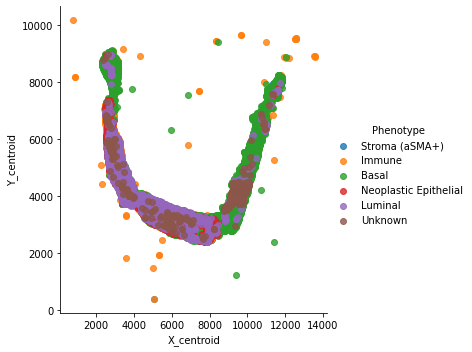

In [56]:
fig = plt.figure()
sns.lmplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype', fit_reg=False)
fig.set_size_inches(15,15)
plt.show()

# Specify cell index to select all neighbors and investigate the neighbor hood

## Select no spatial neighbors

In [57]:
cell_index_to_evaluate = 2500

n_sp_neighbor_indices = no_spatial_ni[no_spatial_ni["Base Cell"] == cell_index_to_evaluate].copy()
n_sp_phenotype_indices = phenotypes.loc[[cell_index_to_evaluate]]

n_sp_neighbor_indices.drop(n_sp_neighbor_indices.columns[len(n_sp_neighbor_indices.columns)-1], axis=1, inplace=True)
n_sp_phenotype_indices.drop(n_sp_phenotype_indices.columns[len(n_sp_phenotype_indices.columns)-1], axis=1, inplace=True)



print(n_sp_phenotype_indices)
print(n_sp_neighbor_indices)

                  Base Cell                      1                      2  \
2500  Neoplastic Epithelial  Neoplastic Epithelial  Neoplastic Epithelial   

                          3                      4                      5  
2500  Neoplastic Epithelial  Neoplastic Epithelial  Neoplastic Epithelial  
      Base Cell      1     2     3     4     5     6
2500       2500  10092  1371  6360  4167  4252  1932


In [58]:
n_sp_cells = data.loc[n_sp_neighbor_indices.values[0].tolist()][["X_centroid", "Y_centroid"]]
n_sp_cells["Phenotype"] = phenotypes["Base Cell"]
n_sp_origin = pd.DataFrame(n_sp_cells.loc[[cell_index_to_evaluate]])
n_sp_neighbors = n_sp_cells[1:]

Show nearest neighbor for given cell

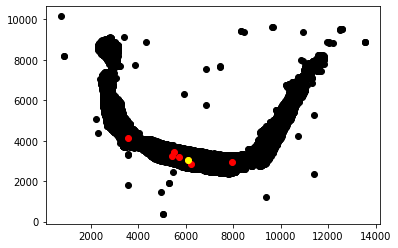

In [59]:
plt.scatter(data["X_centroid"] ,data["Y_centroid"], facecolors='black')
plt.scatter(n_sp_cells["X_centroid"], n_sp_cells["Y_centroid"] , color="red")
plt.scatter(n_sp_origin["X_centroid"], n_sp_origin["Y_centroid"] , color="yellow")
plt.show()

## Select spatial neighbors

In [60]:
sp_neighbor_indices = spatial_ni[spatial_ni["Base Cell"] == cell_index_to_evaluate].copy()
sp_phenotype_indices = phenotypes.loc[[cell_index_to_evaluate]]

sp_neighbor_indices.drop(sp_neighbor_indices.columns[len(sp_neighbor_indices.columns)-1], axis=1, inplace=True)
sp_phenotype_indices.drop(sp_phenotype_indices.columns[len(sp_phenotype_indices.columns)-1], axis=1, inplace=True)

print(sp_phenotype_indices)
print(sp_neighbor_indices)

                  Base Cell                      1                      2  \
2500  Neoplastic Epithelial  Neoplastic Epithelial  Neoplastic Epithelial   

                          3                      4                      5  
2500  Neoplastic Epithelial  Neoplastic Epithelial  Neoplastic Epithelial  
      Base Cell     1     2     3     4     5     6
2500       2500  1371  4167  4252  6360  3298  3392


In [61]:
sp_cells = data.loc[sp_neighbor_indices.values[0].tolist()][["X_centroid", "Y_centroid"]]
sp_cells["Phenotype"] = phenotypes["Base Cell"]
sp_cells
sp_neighbors = sp_cells[1:]
sp_origin = pd.DataFrame(sp_cells.loc[[cell_index_to_evaluate]])

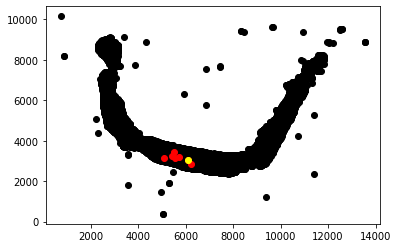

In [62]:
plt.scatter(data["X_centroid"] ,data["Y_centroid"], facecolors='black')
plt.scatter(sp_cells["X_centroid"], sp_cells["Y_centroid"] , color="red")
plt.scatter(sp_origin["X_centroid"], sp_origin["Y_centroid"] , color="yellow")

# Compare spatial and non spatial neighbors


Plot shows where the neighbors are located for the given cell, when including spatial information and without spatial information

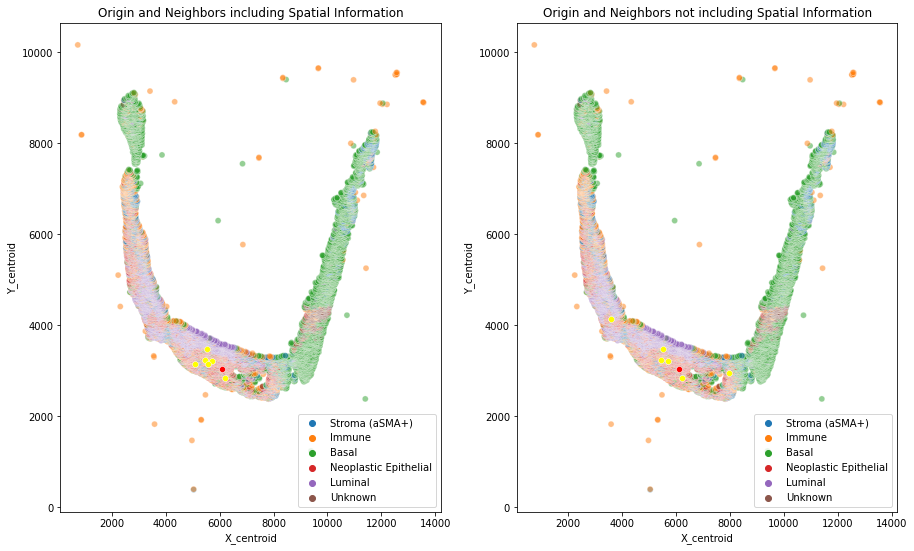

In [63]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,9))

sns.scatterplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype',  ax=ax1, alpha=0.5)
sns.scatterplot(x='X_centroid', y='Y_centroid', data=sp_neighbors, ax=ax1, color="yellow")
sns.scatterplot(x='X_centroid', y='Y_centroid', data=sp_origin, ax=ax1, color="red")
ax1.set_title("Origin and Neighbors including Spatial Information")


sns.scatterplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype',  ax=ax2, alpha=0.5)
sns.scatterplot(x='X_centroid', y='Y_centroid', data=n_sp_neighbors, ax=ax2, color="yellow")
sns.scatterplot(x='X_centroid', y='Y_centroid', data=n_sp_origin, ax=ax2, color="red")
ax2.set_title("Origin and Neighbors not including Spatial Information")
plt.show()

# Distance calculations

Calculate distances for neighbors and for phenotypes

In [65]:
combined_euclidean_distances = pd.read_csv(f"data/{case_to_evaluate}/neighbor_based/combined_euclidean_distances.csv")
combined_euclidean_distances.head()


,Cell,1 Neighbor,2 Neighbor,3 Neighbor,4 Neighbor,5 Neighbor,6 Neighbor,Origin
0,0,6.449770,6.639527,6.369780,6.349010,3.484279,6.323737,no_spatial 6
1,1,5.775898,6.857863,6.227391,6.620418,3.418179,6.501204,no_spatial 6
2,2,6.045290,6.044552,6.030460,6.059087,7.345319,5.512456,no_spatial 6
3,3,5.831615,6.879424,0.810789,5.444171,5.819957,0.923342,no_spatial 6
4,4,0.811445,5.489354,4.489407,5.302483,3.902264,4.748683,no_spatial 6


In [66]:
no_sp_euclidean_distances = combined_euclidean_distances[combined_euclidean_distances["Origin"].str.contains("no_spatial")].copy()
no_sp_euclidean_distances["Phenotype"] = phenotypes["Base Cell"].values
no_sp_euclidean_distances.head()

,Cell,1 Neighbor,2 Neighbor,3 Neighbor,4 Neighbor,5 Neighbor,6 Neighbor,Origin,Phenotype
0,0,6.449770,6.639527,6.369780,6.349010,3.484279,6.323737,no_spatial 6,Stroma (aSMA+)
1,1,5.775898,6.857863,6.227391,6.620418,3.418179,6.501204,no_spatial 6,Immune
2,2,6.045290,6.044552,6.030460,6.059087,7.345319,5.512456,no_spatial 6,Basal
3,3,5.831615,6.879424,0.810789,5.444171,5.819957,0.923342,no_spatial 6,Immune
4,4,0.811445,5.489354,4.489407,5.302483,3.902264,4.748683,no_spatial 6,Immune


In [67]:
sp_euclidean_distances = combined_euclidean_distances[~combined_euclidean_distances["Origin"].str.contains("no_spatial")].copy().reset_index(drop=True)
sp_euclidean_distances["Phenotype"] = phenotypes["Base Cell"].values
sp_euclidean_distances.head()

,Cell,1 Neighbor,2 Neighbor,3 Neighbor,4 Neighbor,5 Neighbor,6 Neighbor,Origin,Phenotype
0,0,0.000078,3.356901,3.355367,3.484279,3.563533,3.484634,spatial 6,Stroma (aSMA+)
1,1,0.000078,3.418179,1.785313,3.346776,3.473424,2.586998,spatial 6,Immune
2,2,1.385615,2.502573,2.832532,1.731153,2.681149,2.607495,spatial 6,Basal
3,3,0.810789,0.923342,0.795229,2.205832,1.917792,1.850119,spatial 6,Immune
4,4,0.811445,0.812119,0.923342,1.803834,1.828513,2.154983,spatial 6,Immune


In [68]:
## Collect data for phenotypes

In [69]:
def calculate_metrics(spatial_data, no_spatial_data, phenotype):
    phenotype_data = []
    
    phenotype_sp_euclidean_distances = spatial_data[spatial_data["Phenotype"] == phenotype].copy()
    phenotype_no_sp_euclidean_distances = no_sp_euclidean_distances[no_sp_euclidean_distances["Phenotype"] == phenotype].copy()

    columns = [column for column in spatial_data.columns if "Neighbor" in column]

    for column in columns:

        phenotype_data.append({
        "Neighbor": column,
        "Mean": phenotype_sp_euclidean_distances[column].mean(),
        "Median": phenotype_sp_euclidean_distances[column].median(),
        "Origin": "Spatial",
        "Phenotype": phenotype,
    })
    
        phenotype_data.append({
        "Neighbor": column,
        "Mean": phenotype_no_sp_euclidean_distances[column].mean(),
        "Median": phenotype_no_sp_euclidean_distances[column].median(),
        "Origin": "No Spatial",
        "Phenotype": phenotype,
    })
    
    return pd.DataFrame().from_records(phenotype_data)


    

In [70]:
basal_metrics = calculate_metrics(sp_euclidean_distances, no_sp_euclidean_distances, "Basal")
basal_metrics

luminal_metrics = calculate_metrics(sp_euclidean_distances, no_sp_euclidean_distances, "Luminal")
luminal_metrics

immune_metrics = calculate_metrics(sp_euclidean_distances, no_sp_euclidean_distances, "Immune")
immune_metrics

combined_metrics = pd.concat([basal_metrics,luminal_metrics,immune_metrics ])

combined_metrics_melted = pd.melt(combined_metrics, id_vars=['Neighbor', "Origin", "Phenotype"],
                                           value_vars=['Mean', 'Median'], var_name='Metric',
                                           value_name='Distance')
combined_metrics_melted

,Neighbor,Origin,Phenotype,Metric,Distance
0,1 Neighbor,Spatial,Basal,Mean,0.174967
1,1 Neighbor,No Spatial,Basal,Mean,0.551438
2,2 Neighbor,Spatial,Basal,Mean,0.197239
3,2 Neighbor,No Spatial,Basal,Mean,0.608002
4,3 Neighbor,Spatial,Basal,Mean,0.207138
...,...,...,...,...,...
67,4 Neighbor,No Spatial,Immune,Median,0.600372
68,5 Neighbor,Spatial,Immune,Median,0.255691
69,5 Neighbor,No Spatial,Immune,Median,0.673023
70,6 Neighbor,Spatial,Immune,Median,0.266319


## Distribution plot

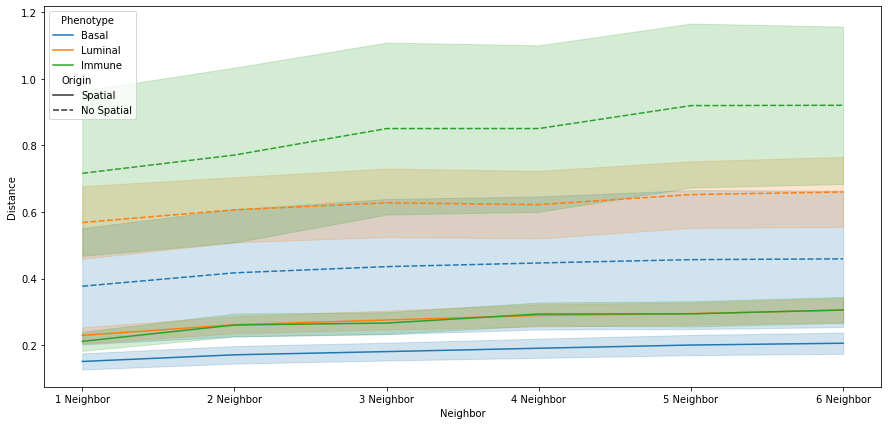

In [71]:
fig = plt.figure()
sns.lineplot(data=combined_metrics_melted, x="Neighbor", y="Distance", hue="Phenotype", style="Origin")
fig.set_size_inches(15,7)

# R2 Significance


Based on this thread
https://www.researchgate.net/post/Comparing_R-squared_values_in_two_models_any_help

and and answer by Ghassan Okour, 
R2 significance is calculated like the following:





```
Firstly; calculate the root square of both squared R.
Secondly; transform the values of the root square of both squared R into Fisher values.
Thirdly; use the formula Z=[z1-z2]/sqrt[(1/(n1-3))+(1/(n2-3))].
Fourthly; use the formula Sig. =(1-NORM.S.DIST(ABS(Z),TRUE))*2.
```



In [72]:
# z function

def calculate_z(input1, input2):
  print(input1)
  print(input2)


In [73]:
no_spatial_r2_scores_2 = pd.read_csv("no_spatial_imputed_r2_score_2.csv")
no_spatial_r2_scores_3 = pd.read_csv("no_spatial_imputed_r2_score_3.csv")

no_spatial_r2_scores_2.rename(columns={"Score": "2 Neighbor Score"}, inplace=True)
no_spatial_r2_scores_3.rename(columns={"Score": "3 Neighbor Score"}, inplace=True)

markers = no_spatial_r2_scores_2["Marker"]

combined = pd.concat([no_spatial_r2_scores_2, no_spatial_r2_scores_3], axis=1)
combined.drop(columns=["Marker"], inplace=True)
combined["Marker"] = markers

# Set negative values to 0
num = combined._get_numeric_data()
num[num < 0] = 0

combined['2 Neighbor Squareroot']=combined['2 Neighbor Score']**(1/2)
combined['3 Neighbor Squareroot']=combined['3 Neighbor Score']**(1/2)


combined["2 Neighbor Z"] = combined["2 Neighbor Squareroot"].apply(lambda x : 0.5* (np.log(1 + x) - np.log(1-x)))
combined["3 Neighbor Z"] = combined["3 Neighbor Squareroot"].apply(lambda x : 0.5* (np.log(1 + x) - np.log(1-x)))
combined["Z"] = (combined["2 Neighbor Z"] - combined["3 Neighbor Z"]) / np.sqrt(1 / (combined["2 Neighbor Z"].shape[0]-3) + (1/(combined["3 Neighbor Z"].shape[0]-3)))
combined["Significane"] = (1 - np.random.normal(np.absolute(combined["Z"]))) * 2
print(combined)

FileNotFoundError: [Errno 2] No such file or directory: 'no_spatial_imputed_r2_score_2.csv'